Training Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,M14906,M,298.7,309.0,1843,25.8,130,0,No Failure,...,3888.111182,1.230485,0.441157,1,-1.124336,0.630469,-0.621904,0.198119,0.385376,-0.308169
2,3,L47227,L,298.8,309.1,1418,46.3,133,0,No Failure,...,2181.639753,1.213335,0.768289,0,-0.199003,-0.012131,-0.464246,-0.341381,0.622772,-0.216720
3,4,H29462,H,298.8,309.2,1425,53.9,135,0,No Failure,...,3819.147489,-0.593589,-0.722052,0,0.455568,-1.276486,0.129476,-0.829978,0.279540,-0.029202
4,5,M14909,M,298.9,309.2,1412,44.1,140,0,No Failure,...,801.375247,-1.457742,-0.116568,0,0.117924,-0.610483,-0.017933,-0.496937,0.440133,-0.187622


In [4]:
df.shape

(6903, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      6903 non-null   int64  
 1   Product ID               6903 non-null   object 
 2   Type                     6903 non-null   object 
 3   Air temperature [K]      6903 non-null   float64
 4   Process temperature [K]  6903 non-null   float64
 5   Rotational speed [rpm]   6903 non-null   int64  
 6   Torque [Nm]              6903 non-null   float64
 7   Tool wear [min]          6903 non-null   int64  
 8   Target                   6903 non-null   int64  
 9   Failure Type             6903 non-null   object 
 10  operational_hours        6903 non-null   int64  
 11  RUL                      6903 non-null   float64
 12  Vibration (mm/s)         6903 non-null   float64
 13  Pressure (Pa)            6903 non-null   float64
 14  Maintenance Required    

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,6903.0,3452.000000,1992.868786,1.000000,1726.500000,3452.000000,5177.500000,6903.000000
Air temperature [K],6903.0,300.652919,1.926195,295.300000,299.200000,300.800000,302.200000,304.500000
Process temperature [K],6903.0,310.193539,1.473016,305.700000,309.200000,310.300000,311.100000,313.800000
Rotational speed [rpm],6903.0,1541.055918,187.249405,1183.000000,1421.000000,1504.000000,1613.000000,2886.000000
Torque [Nm],6903.0,40.032913,10.226721,3.800000,33.100000,40.100000,46.900000,76.600000
Tool wear [min],6903.0,108.462263,64.398001,0.000000,53.000000,108.000000,164.000000,253.000000
Target,6903.0,0.047081,0.211827,0.000000,0.000000,0.000000,0.000000,1.000000
operational_hours,6903.0,2601.430537,1435.806621,111.000000,1320.500000,2545.000000,3917.000000,4995.000000
RUL,6903.0,2357.459043,1435.733497,-43.059499,1034.705461,2437.613362,3628.827145,4869.004338
Vibration (mm/s),6903.0,0.011324,0.994315,-1.732027,-0.853030,0.023697,0.871008,1.731966


In [7]:
df.describe(include= 'object')

,Product ID,Type,Failure Type
count,6903,6903,6903
unique,6903,3,6
top,M14860,L,No Failure
freq,1,4145,6568


In [8]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
operational_hours          0
RUL                        0
Vibration (mm/s)           0
Pressure (Pa)              0
Maintenance Required       0
Temp_Change                0
Vib_Change                 0
Temperature_Mean           0
Vibration_Mean             0
Pressure_Mean              0
RPM_Mean                   0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Filtering Categorical Calumns
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [11]:
# Print Categorical Columns
cat_cols

['Product ID', 'Type', 'Failure Type']

In [12]:
# value counts for categorical columns
for col in cat_cols:
    print(df[col].value_counts())

Product ID
M14860    1
L52537    1
L52535    1
L52534    1
L52533    1
         ..
L50224    1
L50223    1
L50222    1
L50221    1
L57154    1
Name: count, Length: 6903, dtype: int64
Type
L    4145
M    2089
H     669
Name: count, dtype: int64
Failure Type
No Failure                  6568
Heat Dissipation Failure     112
Power Failure                 92
Overstrain Failure            71
Tool Wear Failure             43
Random Failures               17
Name: count, dtype: int64


In [13]:
df_f = df[df.Target==1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                92
Overstrain Failure           71
Tool Wear Failure            43
No Failure                    7
Name: count, dtype: int64

In [14]:
idx= df_f[df_f['Failure Type']== 'No Failure'].index
df.drop(idx, axis=0, inplace= True)

In [15]:
df_f = df[df.Target==0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         6561
Random Failures      17
Name: count, dtype: int64

In [16]:
idx= df_f[df_f['Failure Type']== 'Random Failures'].index
df.drop(idx, axis=0, inplace= True)

In [17]:
# Shape Check
df.shape

(6879, 21)

In [18]:
num_cols= df.select_dtypes(exclude='O').columns.tolist()
num_cols

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'operational_hours',
 'RUL',
 'Vibration (mm/s)',
 'Pressure (Pa)',
 'Maintenance Required',
 'Temp_Change',
 'Vib_Change',
 'Temperature_Mean',
 'Vibration_Mean',
 'Pressure_Mean',
 'RPM_Mean']

DATA VISUALISATION

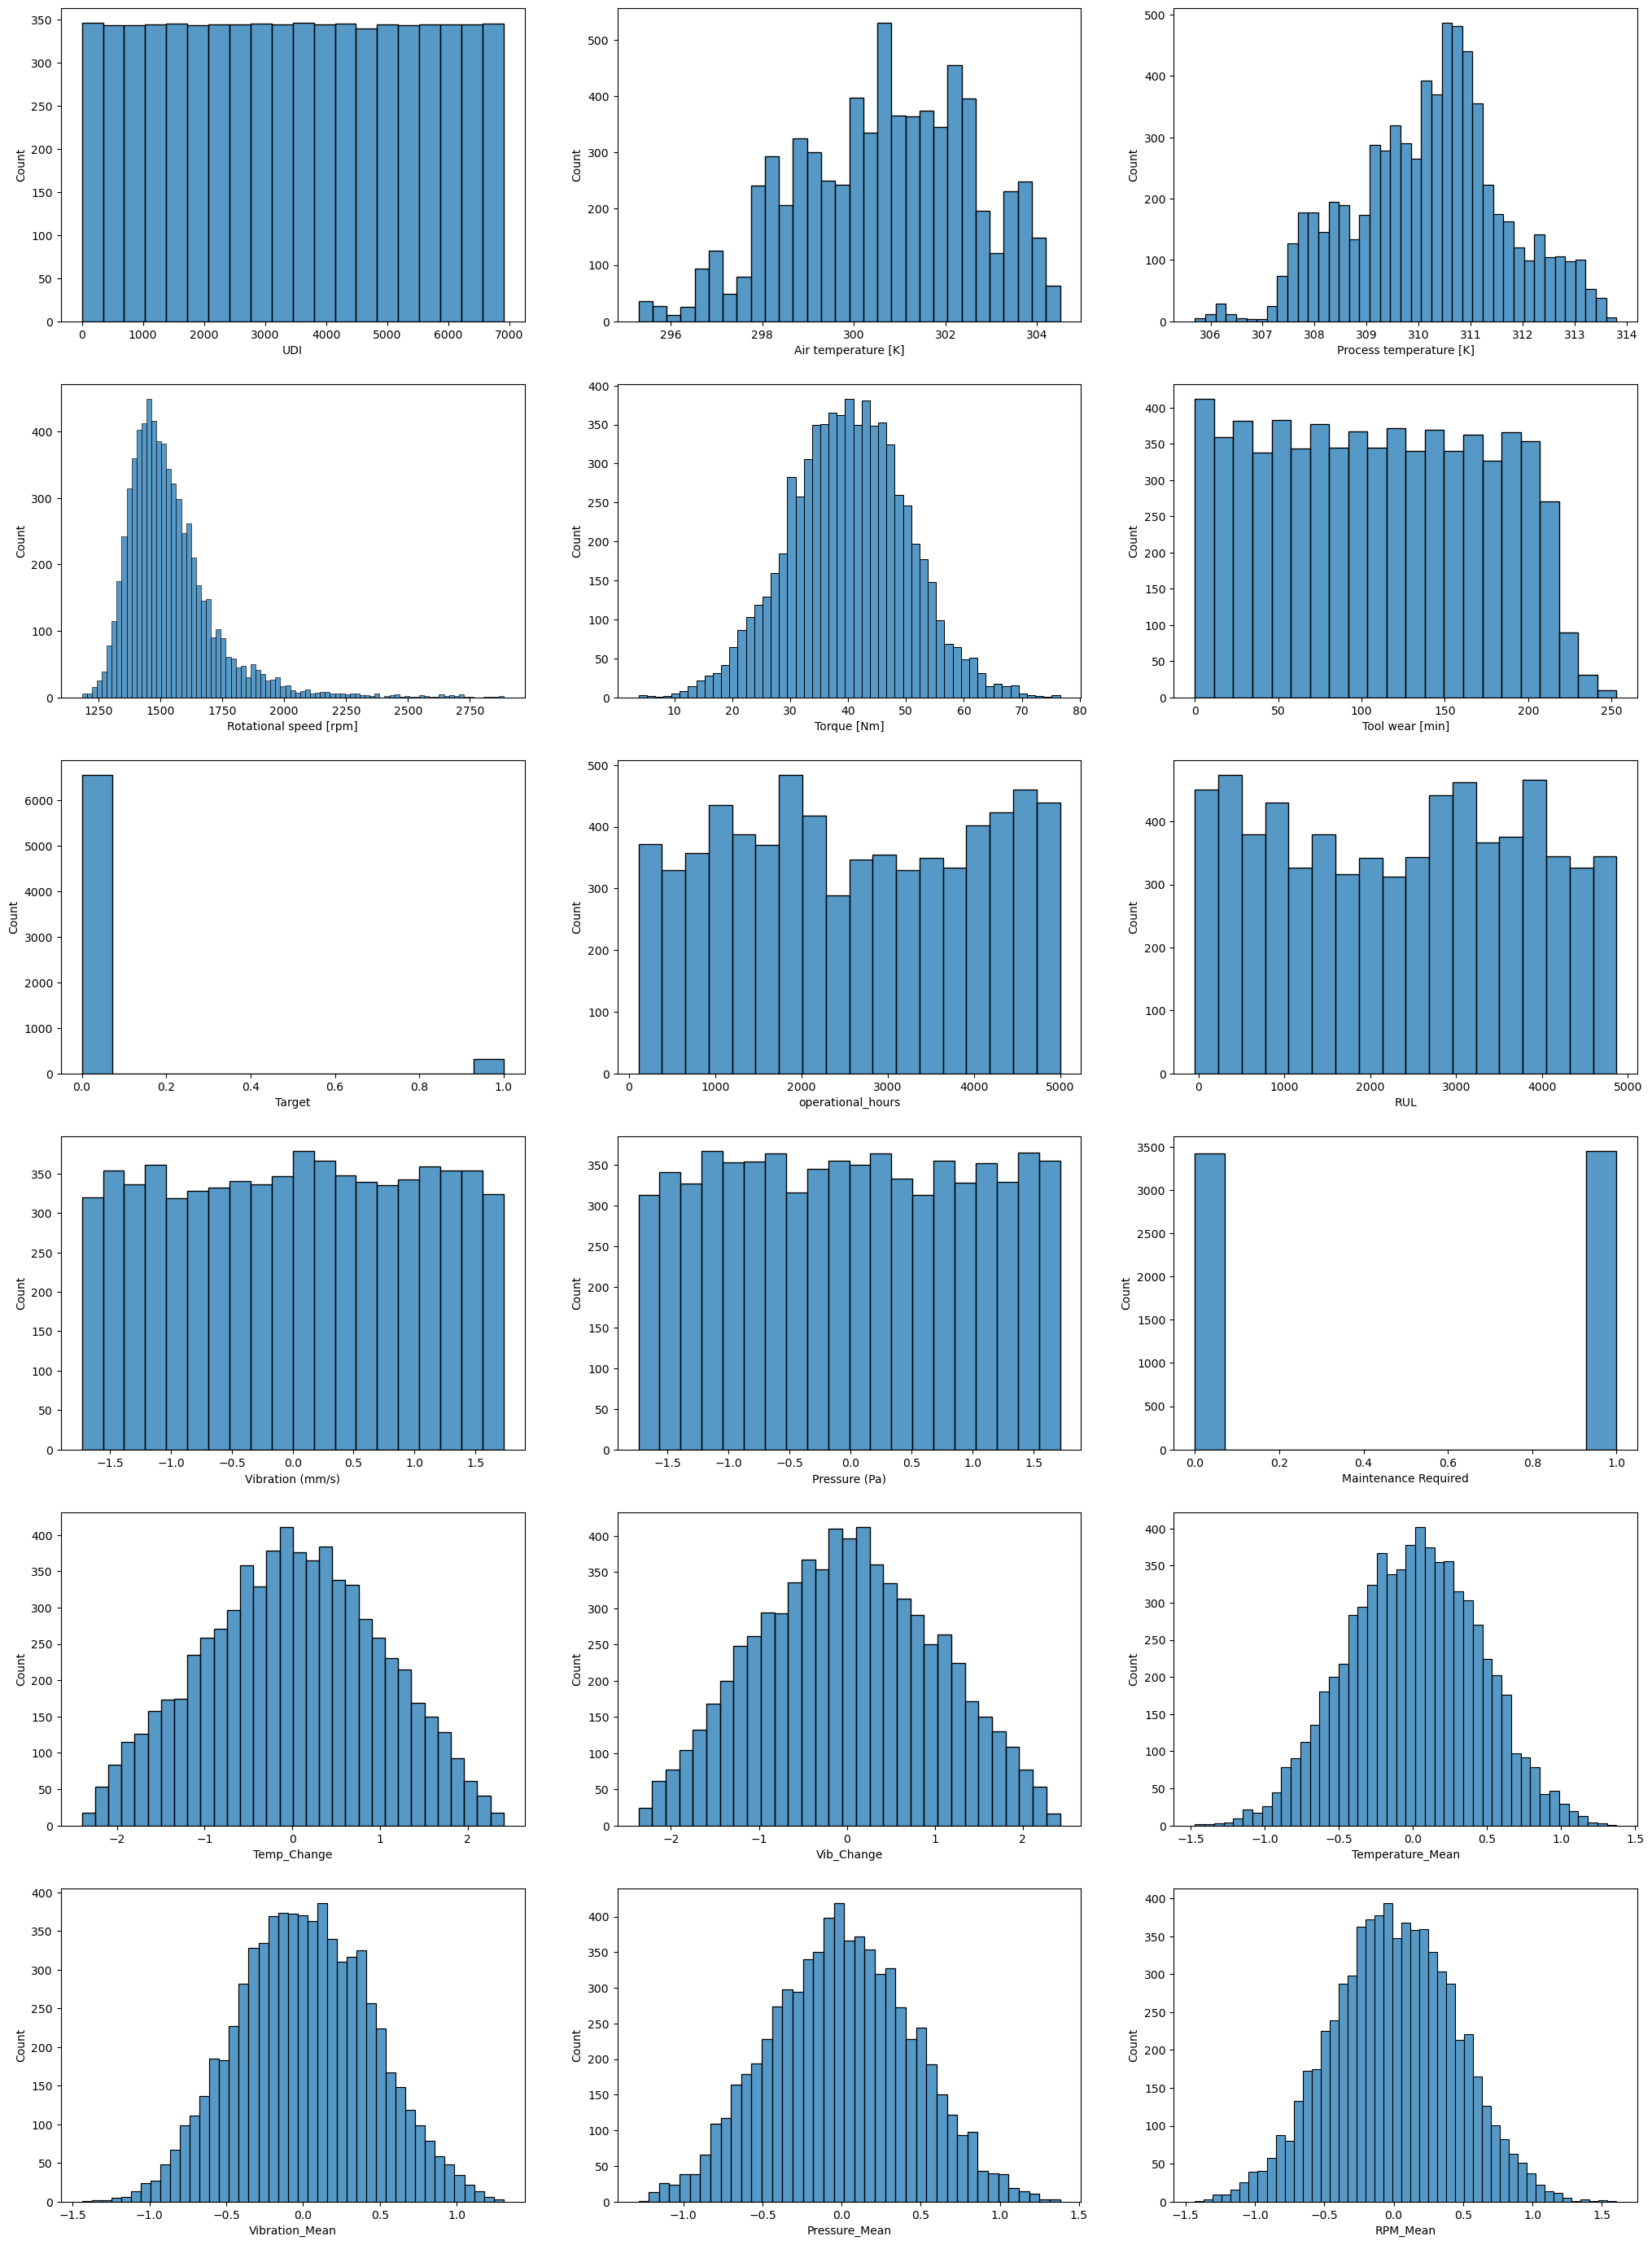

In [19]:
# Pair Plot
plt.figure(figsize= (25,35))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(6,3,i)
    sns.histplot(data= df, x= col)
plt.show()

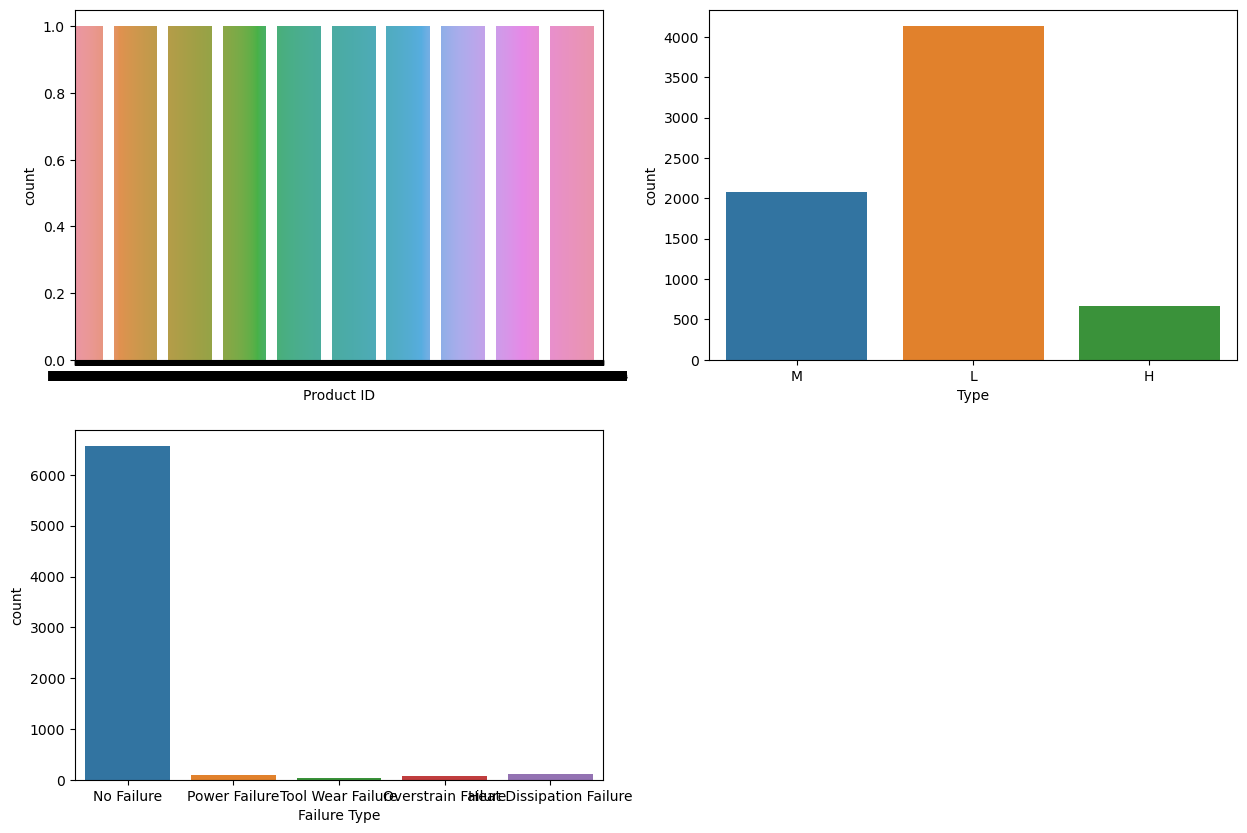

In [20]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data= df, x= col)
plt.show()

TRAINING MODEL

In [21]:
# Preparing data for model Training

x= df.drop(['Target', 'Failure Type'], axis= 1)
y= df['Target']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Splitting Data Into Train and test
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
# Filtering the Categorical and Numerical Features for the Further Analysis and Operations
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

In [25]:
cat_cols

['Product ID', 'Type']

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [27]:
# Column Transformation For the Numerical and categorical features
enc= OneHotEncoder(handle_unknown= 'ignore')
sc= StandardScaler()

ct= ColumnTransformer(
        [
            ('encoding', enc, cat_cols),
            ('scaling', sc, num_cols)
        ]
)

In [28]:
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)


Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# Fit the Modle on train data
clf= LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred= clf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1308
           1       0.78      0.26      0.40        68

    accuracy                           0.96      1376
   macro avg       0.87      0.63      0.69      1376
weighted avg       0.95      0.96      0.95      1376



In [34]:
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regession: ', Logistic)

Logistic Regession:  0.9600290697674418


In [35]:
confusion_matrix(y_test, y_pred)

array([[1303,    5],
       [  50,   18]], dtype=int64)

In [36]:
roc_auc_score(y_test, y_pred)

0.6304416261917611

Text(0, 0.5, 'True Positive Rate')

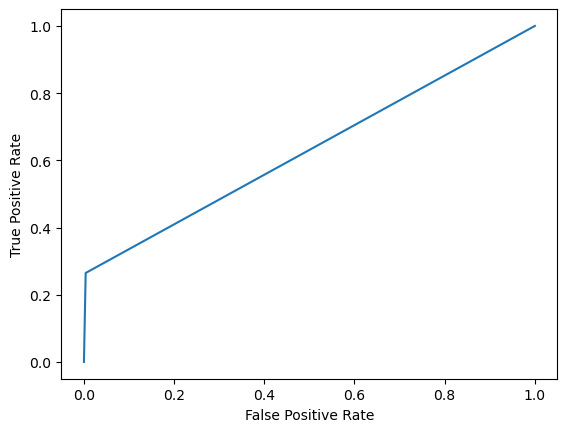

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [38]:
# Train data Analysis For Logistic Regression

In [39]:
y_pred_t= clf.predict(X_train)

In [40]:
print(classification_report(y_train, y_pred_t))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5253
           1       0.92      0.29      0.44       250

    accuracy                           0.97      5503
   macro avg       0.95      0.65      0.71      5503
weighted avg       0.97      0.97      0.96      5503



In [41]:
accuracy_score(y_train, y_pred_t)

0.9667454115936762

In [42]:
confusion_matrix(y_train,y_pred_t)

array([[5247,    6],
       [ 177,   73]], dtype=int64)


Support Vector MAchines

In [43]:
from sklearn.svm import SVC

In [44]:
svm= SVC()

In [45]:
svm.fit(X_train,y_train)

SVC()

In [46]:
y_pred_svm= svm.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1308
           1       0.67      0.03      0.06        68

    accuracy                           0.95      1376
   macro avg       0.81      0.51      0.52      1376
weighted avg       0.94      0.95      0.93      1376



In [48]:
SVM =accuracy_score(y_test, y_pred_svm)
print('SVM :', SVM)

SVM : 0.9513081395348837


In [49]:
confusion_matrix(y_test, y_pred_svm)

array([[1307,    1],
       [  66,    2]], dtype=int64)

In [50]:
roc_auc_score(y_test, y_pred_svm)

0.5143236193559992

Text(0, 0.5, 'True Positive Rate')

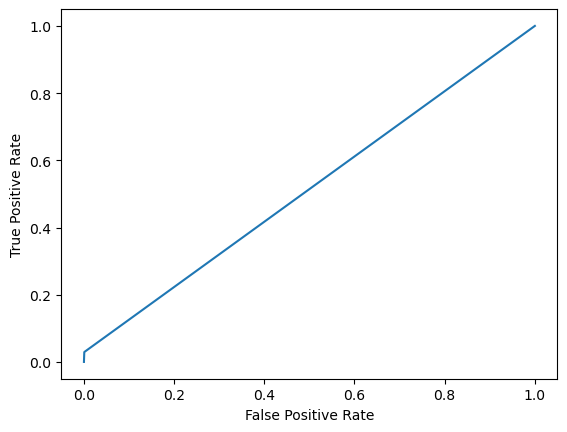

In [51]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_svm)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [52]:
# Train data

In [53]:
y_pred_svmt = svm.predict(X_train)

In [54]:
print(classification_report(y_train, y_pred_svmt))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5253
           1       1.00      0.18      0.31       250

    accuracy                           0.96      5503
   macro avg       0.98      0.59      0.65      5503
weighted avg       0.96      0.96      0.95      5503



In [55]:
accuracy_score(y_train, y_pred_svmt)

0.9629293112847538

In [56]:
confusion_matrix(y_train, y_pred_svmt)

array([[5253,    0],
       [ 204,   46]], dtype=int64)

In [57]:
roc_auc_score(y_train, y_pred_svmt)

0.592

Text(0, 0.5, 'True Positive Rate')

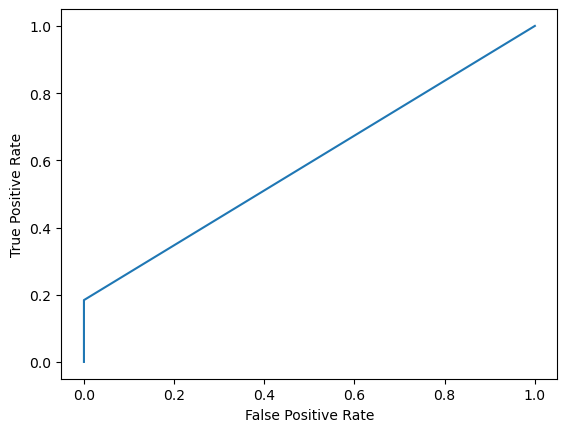

In [58]:
fpr, tpr, thresholds= roc_curve(y_train, y_pred_svmt)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


SVM Model with RBF Kernel

In [59]:
rbf= SVC(kernel= 'rbf')

In [60]:
rbf.fit(X_train, y_train)

SVC()

In [61]:
y_rbf = rbf.predict(X_test)

In [62]:
print(classification_report(y_test, y_rbf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1308
           1       0.67      0.03      0.06        68

    accuracy                           0.95      1376
   macro avg       0.81      0.51      0.52      1376
weighted avg       0.94      0.95      0.93      1376



In [63]:
svm_rbf= accuracy_score(y_test, y_rbf)
print('SVM Modle with RBF Kernel: ', svm_rbf)

SVM Modle with RBF Kernel:  0.9513081395348837


In [64]:
confusion_matrix(y_test, y_rbf)

array([[1307,    1],
       [  66,    2]], dtype=int64)

In [65]:
roc_auc_score(y_test, y_rbf)

0.5143236193559992

Text(0, 0.5, 'True Positive Rate')

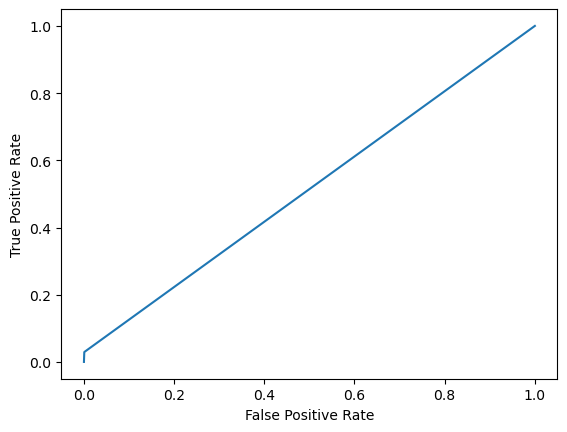

In [66]:
fpr, tpr, _ = roc_curve(y_test, y_rbf) 
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [67]:
y_rbft= rbf.predict(X_train)

In [68]:
print(classification_report(y_train, y_rbft))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5253
           1       1.00      0.18      0.31       250

    accuracy                           0.96      5503
   macro avg       0.98      0.59      0.65      5503
weighted avg       0.96      0.96      0.95      5503



In [69]:
accuracy_score(y_train, y_rbft)

0.9629293112847538

In [70]:
confusion_matrix(y_train, y_rbft)

array([[5253,    0],
       [ 204,   46]], dtype=int64)

Text(0, 0.5, 'TPR')

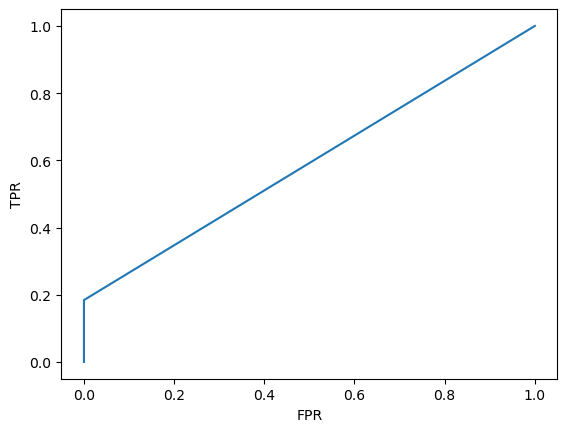

In [71]:
fpr, tpr, _= roc_curve(y_train, y_rbft)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
y_tree= tree.predict(X_test)

In [75]:
print(classification_report(y_test, y_tree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1308
           1       0.67      0.75      0.71        68

    accuracy                           0.97      1376
   macro avg       0.83      0.87      0.85      1376
weighted avg       0.97      0.97      0.97      1376



In [76]:
decision_tree= accuracy_score(y_test, y_tree)
print('Decision Tree: ', decision_tree)

Decision Tree:  0.9694767441860465


In [77]:
confusion_matrix(y_test, y_tree)

array([[1283,   25],
       [  17,   51]], dtype=int64)

In [78]:
roc_auc_score(y_test, y_tree)

0.8654434250764526

Text(0, 0.5, 'TPR')

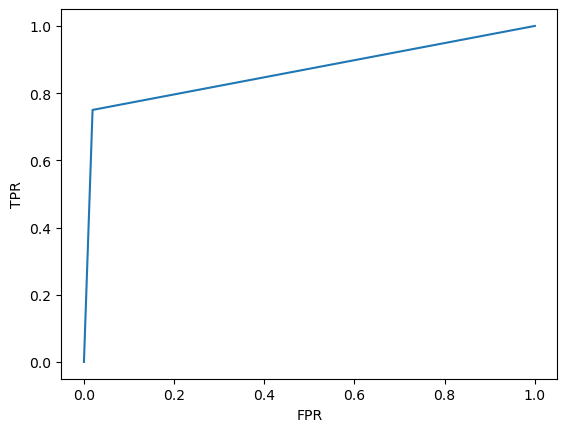

In [79]:
fpr, tpr,_ = roc_curve(y_test, y_tree)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [80]:
y_treet= tree.predict(X_train)

In [81]:
print(classification_report(y_train, y_treet))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5253
           1       1.00      1.00      1.00       250

    accuracy                           1.00      5503
   macro avg       1.00      1.00      1.00      5503
weighted avg       1.00      1.00      1.00      5503



In [82]:
accuracy_score(y_train, y_treet)

1.0

In [83]:
confusion_matrix(y_train, y_treet)

array([[5253,    0],
       [   0,  250]], dtype=int64)

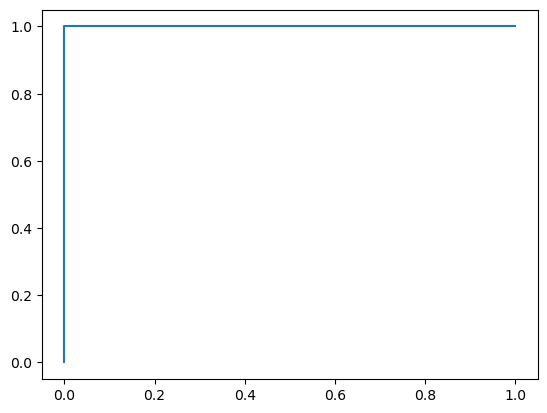

In [84]:
fpr, tpr, _= roc_curve(y_train, y_treet)
plt.plot(fpr, tpr)

In [85]:
roc_auc_score(y_train, y_treet)

1.0


Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
forest= RandomForestClassifier()

In [88]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_forest= forest.predict(X_test)

In [90]:
print(classification_report(y_test, y_forest))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1308
           1       1.00      0.06      0.11        68

    accuracy                           0.95      1376
   macro avg       0.98      0.53      0.54      1376
weighted avg       0.96      0.95      0.93      1376



In [91]:
random_forest = accuracy_score(y_test, y_forest)
print('Random Forest: ', random_forest)

Random Forest:  0.9534883720930233


In [92]:
confusion_matrix(y_test, y_forest)

array([[1308,    0],
       [  64,    4]], dtype=int64)

In [93]:
roc_auc_score(y_test, y_forest)

0.5294117647058824

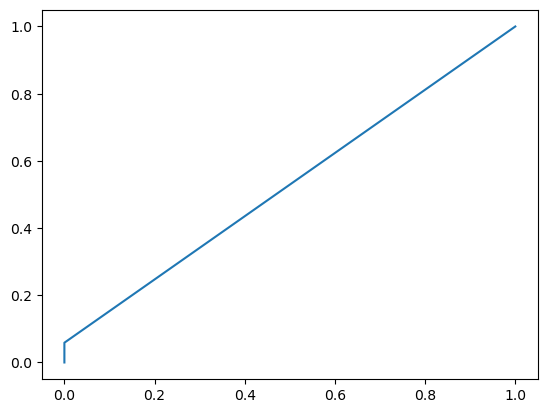

In [94]:
fpr, tpr, _= roc_curve(y_test, y_forest)
plt.plot(fpr, tpr)

In [95]:
y_forestt= forest.predict(X_train)

In [96]:
print(classification_report(y_train, y_forestt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5253
           1       1.00      1.00      1.00       250

    accuracy                           1.00      5503
   macro avg       1.00      1.00      1.00      5503
weighted avg       1.00      1.00      1.00      5503



In [97]:
confusion_matrix(y_train, y_forestt)

array([[5253,    0],
       [   0,  250]], dtype=int64)


Model Comparision

In [98]:
print('Logistic Regession: ', Logistic)
print('SVM :', SVM)
print('SVM Modle with RBF Kernel: ', svm_rbf)
print('Decision Tree: ', decision_tree)
print('Random Forest: ', random_forest)

Logistic Regession:  0.9600290697674418
SVM : 0.9513081395348837
SVM Modle with RBF Kernel:  0.9513081395348837
Decision Tree:  0.9694767441860465
Random Forest:  0.9534883720930233


In [99]:
!pip install pycaret

In [100]:
import pycaret

In [101]:
from pycaret.classification import *

s= setup(df, target = 'Failure Type', session_id = 42, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,Failure Type
2,Target type,Multiclass
3,Target mapping,"Heat Dissipation Failure: 0, No Failure: 1, Overstrain Failure: 2, Power Failure: 3, Tool Wear Failure: 4"
4,Original data shape,"(6879, 21)"
5,Transformed data shape,"(6879, 23)"
6,Transformed train set shape,"(4815, 23)"
7,Transformed test set shape,"(2064, 23)"
8,Numeric features,18
9,Categorical features,2


In [102]:
# Identify the top-performing model based on the Area Under the Curve (AUC) metric
best_model = compare_models(sort='AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9884,1.0000,0.9884,0.9833,0.9851,0.8597,0.8634,0.1750
nb,Naive Bayes,0.9884,0.9999,0.9884,0.9844,0.9859,0.8699,0.8703,0.0450
et,Extra Trees Classifier,0.9844,0.9999,0.9844,0.9819,0.9806,0.8184,0.8204,0.1120
lightgbm,Light Gradient Boosting Machine,0.9539,0.9993,0.9539,0.9099,0.9314,0.0000,0.0000,0.3130
dt,Decision Tree Classifier,0.9643,0.9820,0.9643,0.9562,0.9577,0.6014,0.6074,0.0450
knn,K Neighbors Classifier,0.9533,0.7146,0.9533,0.9197,0.9348,0.0933,0.1467,0.0910
dummy,Dummy Classifier,0.9539,0.5000,0.9539,0.9099,0.9314,0.0000,0.0000,0.0440
lr,Logistic Regression,0.9651,0.0000,0.9651,0.9493,0.9558,0.4896,0.5203,1.1230
svm,SVM - Linear Kernel,0.9529,0.0000,0.9529,0.9135,0.9323,0.0397,0.0625,0.0750
ridge,Ridge Classifier,0.9701,0.0000,0.9701,0.9596,0.9623,0.6653,0.6699,0.0490


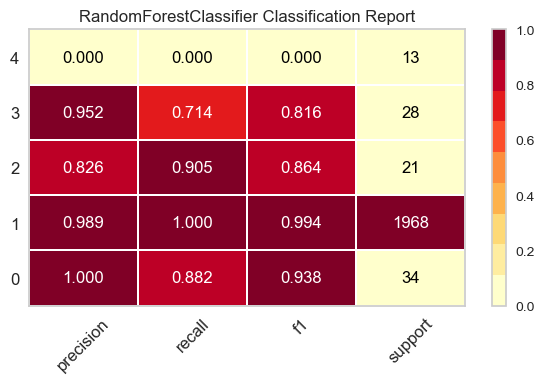

In [103]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

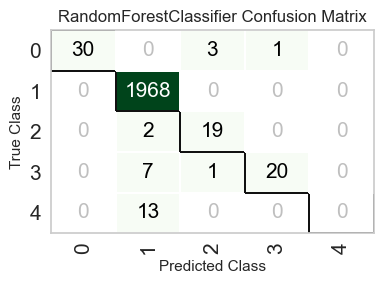

In [104]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

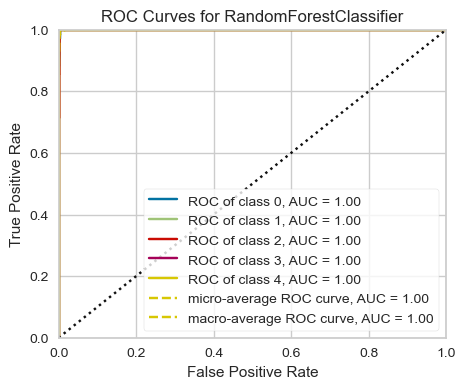

In [105]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

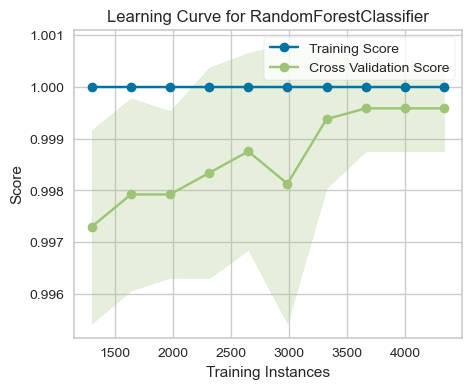

In [106]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'learning')

In [107]:
# Custom cost-benefit scoring function
def custom_cost_benefit(y_true, y_pred):
    maintenance_cost = 2050
    failure_cost = 10300
    tp = np.where((y_pred==1) & (y_true==1), failure_cost-maintenance_cost, 0)
    fp = np.where((y_pred==1) & (y_true==0), -maintenance_cost, 0)
    
    # Negative score because PyCaret optimizes for higher values, we want to minimize cost
    score = np.sum([fp, tp])
    return score

# Add custom cost-benefit metric to PyCaret
add_metric('cost_benefit', 'Cost-Benefit', custom_cost_benefit)

Name                                                      Cost-Benefit
Display Name                                              Cost-Benefit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(custom_cost_benefit, response_meth...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: cost_benefit, dtype: object

In [108]:
best_model = compare_models(sort = 'Cost-Benefit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Cost-Benefit,TT (Sec)
lr,Logistic Regression,0.9651,0.0000,0.9651,0.9493,0.9558,0.4896,0.5203,0.0000,0.3330
knn,K Neighbors Classifier,0.9533,0.7146,0.9533,0.9197,0.9348,0.0933,0.1467,0.0000,0.0740
nb,Naive Bayes,0.9884,0.9999,0.9884,0.9844,0.9859,0.8699,0.8703,0.0000,0.0460
dt,Decision Tree Classifier,0.9643,0.9820,0.9643,0.9562,0.9577,0.6014,0.6074,0.0000,0.0470
svm,SVM - Linear Kernel,0.9529,0.0000,0.9529,0.9135,0.9323,0.0397,0.0625,0.0000,0.0690
ridge,Ridge Classifier,0.9701,0.0000,0.9701,0.9596,0.9623,0.6653,0.6699,0.0000,0.0450
rf,Random Forest Classifier,0.9884,1.0000,0.9884,0.9833,0.9851,0.8597,0.8634,0.0000,0.1860
qda,Quadratic Discriminant Analysis,0.9618,0.0000,0.9618,0.9553,0.9563,0.5741,0.5805,0.0000,0.0450
ada,Ada Boost Classifier,0.9672,0.0000,0.9672,0.9577,0.9599,0.6332,0.6385,0.0000,0.2080
gbc,Gradient Boosting Classifier,0.9539,0.0000,0.9539,0.9099,0.9314,0.0000,0.0000,0.0000,1.3870


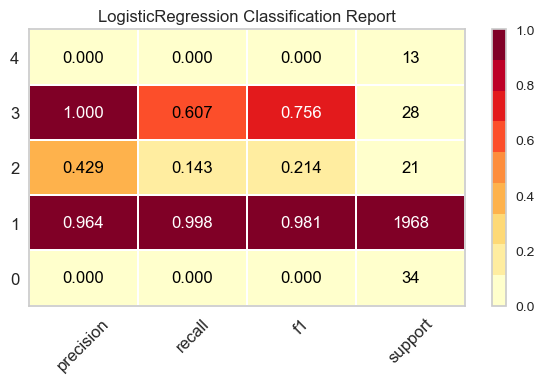

In [109]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

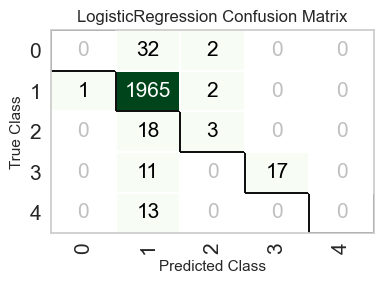

In [110]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

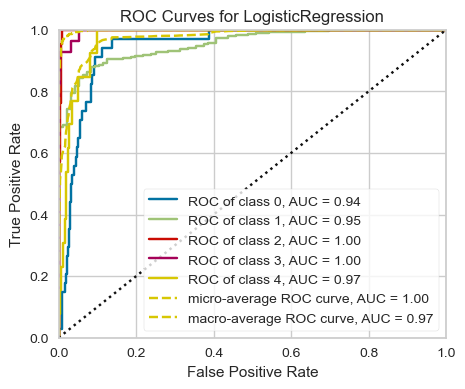

In [111]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

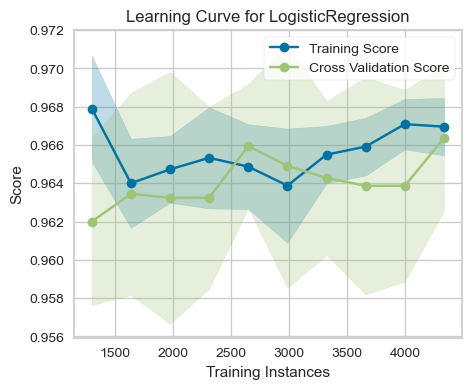

In [112]:
plt.figure(figsize = (5, 4))
plot_model(best_model, plot = 'learning')